# Pertanyaan yang dijadikan acuan analisa

1. Halaman mana yang memiliki performa terbaik berdasarkan kombinasi jumlah user yang mengunjungi halaman, jumlah total halaman yang dikunjungi, dan waktu rata-rata per halaman yang dikunjungi?
2. Bagaimana korelasi antara jumlah total tampilan halaman dengan rata-rata jumlah halaman yang dilihat selama satu sesi?
3. Bagaimana hubungan antara rata-rata jumlah halaman yang dilihat selama satu sesi dengan waktu rata-rata yang dihabiskan di tiap halaman?



# Import Packages/Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# memuat tabel 'Assignment Data Analyst MSIB Batch 7 - Sheet1.csv' yang berisi data informasi berita
article_df = pd.read_csv('/content/drive/MyDrive/Magang/detik.com/Assignment Data Analyst MSIB Batch 7 - Sheet1.csv')

# tampilkan 5 baris pertama data pada tabel article_df
article_df.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233


# Assessing Data

periksa tipe data dan missing value dari article_df

In [7]:
article_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ga:sourceMedium         156 non-null    object 
 1   ga:pageTitle            156 non-null    object 
 2   ga:users                155 non-null    float64
 3   ga:bounceRate           155 non-null    float64
 4   ga:pageviews            155 non-null    float64
 5   ga:pageviewsPerSession  155 non-null    float64
 6   ga:avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


Terdapat missing value dari tabel article_df yaitu pada kolom ga:users, ga:bounceRate, ga:pageviews, ga:pageviewsPerSession, dan ga:avgTimeOnPage



---

periksa duplikasi data

In [8]:
print('Jumlah duplikasi: ', article_df.duplicated().sum())

Jumlah duplikasi:  0




---

Periksa parameter statistik data

In [9]:
article_df.describe()

,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1995.722581,31.925982,3607.174194,16.204284,75.428357
std,6449.314679,36.030184,11845.050364,32.522916,77.975259
min,9.000000,0.000000,215.000000,0.000000,2.814915
25%,108.000000,0.000000,287.000000,0.000000,16.948403
50%,233.000000,17.070773,431.000000,2.353535,44.720930
75%,458.000000,62.401881,826.000000,22.194444,109.392803
max,43893.000000,100.000000,83593.000000,268.833333,449.897196


# Cleaning Data

Menghapus missing value pada tabel article_df

In [12]:
article_df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)

In [45]:
# mencari artikel dengan jumlah users terbanyak
maxUsersIndex = article_df['ga:users'].idxmax()
print('Artikel dengan jumlah users terbanyak:', article_df.loc[maxUsersIndex, ['ga:pageTitle']].to_string(index=False))
print('Jumlah users:', article_df.loc[maxUsersIndex, ['ga:users']].to_string(index=False))

# mencari artikel dengan jumlah pageviews terbanyak
maxPageviewsIndex = article_df['ga:pageviews'].idxmax()
print('\nArtikel dengan jumlah pageviews terbanyak:', article_df.loc[maxPageviewsIndex, ['ga:pageTitle']].to_string(index=False))
print('Jumlah pageviews:', article_df.loc[maxPageviewsIndex, ['ga:pageviews']].to_string(index=False))

# mencari artikel dengan avgTimeOnPage terbanyak
maxAvgTimeIndex = article_df['ga:avgTimeOnPage'].idxmax()
print('\nArtikel dengan waktu rata-rata per halaman terbanyak:', article_df.loc[maxAvgTimeIndex, ['ga:pageTitle']].to_string(index=False))
print('Jumlah waktu rata-rata per halaman:', article_df.loc[maxAvgTimeIndex, ['ga:avgTimeOnPage']].to_string(index=False))

Artikel dengan jumlah users terbanyak: Antar 'Tuyul', 7 Pengemudi Grab Dibekuk
Jumlah users:  43893.0

Artikel dengan jumlah pageviews terbanyak: Bikin Lambe Turah Diomelin, Nih Si Seksi yang L...
Jumlah pageviews:  83593.0

Artikel dengan waktu rata-rata per halaman terbanyak: Jakarta Berkelas Dunia, Ini 5 Mimpi Sandiaga Uno
Jumlah waktu rata-rata per halaman:  449.897196


Dari output tersebut dapat diketahui jika artikel yang memiliki jumlah users, pageviews, dan avgTimeOnPage terbanyak berbeda-beda

In [26]:
# menghitung efektivitas halaman menggunakan kombinasi metrik (users, pageviews, dan avgTimeOnPage) untuk menganalisis performa artikel
article_df['effectiveness'] = article_df['ga:users'] * article_df['ga:pageviews'] * article_df['ga:avgTimeOnPage']

# menampilkan 5 halaman yang memiliki efektivitas terbaik
topEffectivenessPage = article_df.sort_values(by='effectiveness', ascending=False)
topEffectivenessPage.reset_index(drop=True, inplace=True)
topEffectivenessPage.index += 1  # Menambah 1 pada indeks agar index dimulai dari angka 1

print(topEffectivenessPage[['ga:pageTitle', 'effectiveness']].head())

                                        ga:pageTitle  effectiveness
1        Melihat Kantor Pelayanan Grab Driver Center   3.281936e+11
2  2 Pelajar di Yogya Lempar Batu ke Mobil hingga...   1.070468e+11
3  Viral Wali Kota Mataram Tendang Satpol PP, Ini...   1.057795e+11
4  TNI AD Merasa Dilecehkan di Acara, Stasiun TV ...   8.042946e+10
5  Sultan Brunei Laporkan Kasus Pencemaran Nama B...   7.358761e+10


In [46]:
# menghitung korelasi antara users, pageviews, dan avgTimeOnPage
article_df[['ga:users', 'ga:pageviews', 'ga:avgTimeOnPage']].corr()

,ga:users,ga:pageviews,ga:avgTimeOnPage
ga:users,1.000000,0.744993,0.112836
ga:pageviews,0.744993,1.000000,-0.022068
ga:avgTimeOnPage,0.112836,-0.022068,1.000000


Berdasarkan tabel tersebut, diketahui jika korelasi antara users dan pageviews adalah 0.744993 yang artinya memiliki hubungan positif. kemudian antara users dengan avgTimeOnPage korelasinya adalah 0.112836 yang artinya memiliki hubungan positif namun mendekati nilai 0. Sedangkan antara pageviews dengan avgTimeOnPage korelasinya adalah -0.022068 yang artinya memiliki hubungan negatif



---



In [31]:
# menghitung korelasi antara pageviews dan pageviewsPerSession
article_df[['ga:pageviews', 'ga:pageviewsPerSession']].corr()

,ga:pageviews,ga:pageviewsPerSession
ga:pageviews,1.000000,-0.033231
ga:pageviewsPerSession,-0.033231,1.000000


Berdasarkan tabel tersebut, diketahui korelasi antara pageviews dan pageviewsPerSession sebesar -0.033231 yang artinya memiliki hubungan negatif



---



In [33]:
# menghitung korelasi antara pageviewsPerSession dan avgTimeOnPage
article_df[['ga:pageviewsPerSession', 'ga:avgTimeOnPage']].corr()

,ga:pageviewsPerSession,ga:avgTimeOnPage
ga:pageviewsPerSession,1.000000,-0.033222
ga:avgTimeOnPage,-0.033222,1.000000


Berdasarkan tabel tersebut, diketahui korelasi antara pageviewsPerSession dan avgTimeOnPage sebesar -0.033222 yang artinya memiliki hubungan negatif

# Visualization and Explanatory Analysis

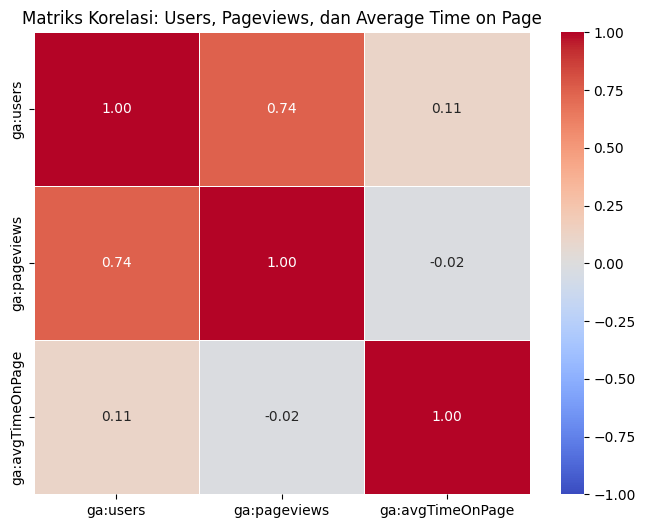

In [47]:
# visualisasi hubungan/korelasi antara users, pageviews, dan avgTimeOnPage menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(article_df[['ga:users', 'ga:pageviews', 'ga:avgTimeOnPage']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matriks')
plt.show()

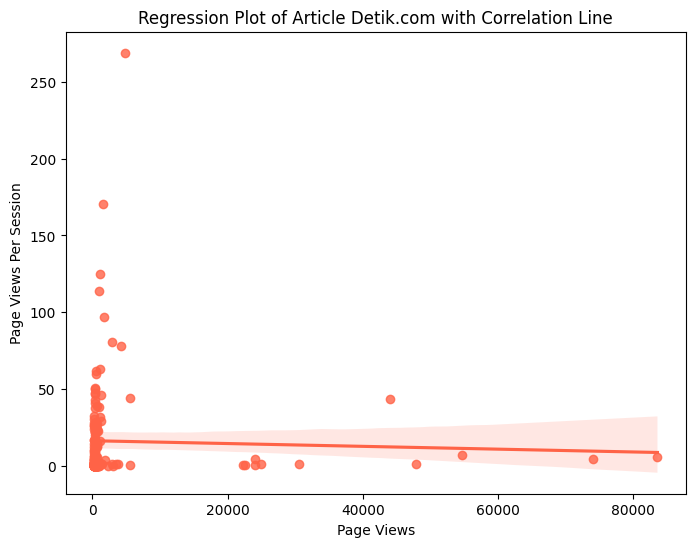

In [51]:
# visualisasi hubungan pageviews dan pageviewsPerSession menggunakan regression plot
plt.figure(figsize=(8, 6))
sns.regplot(data=article_df, x='ga:pageviews', y='ga:pageviewsPerSession', color='#FF6347')
plt.title('Regression Plot of Article Detik.com with Correlation Line')
plt.xlabel('Page Views')
plt.ylabel('Page Views Per Session')
plt.show()

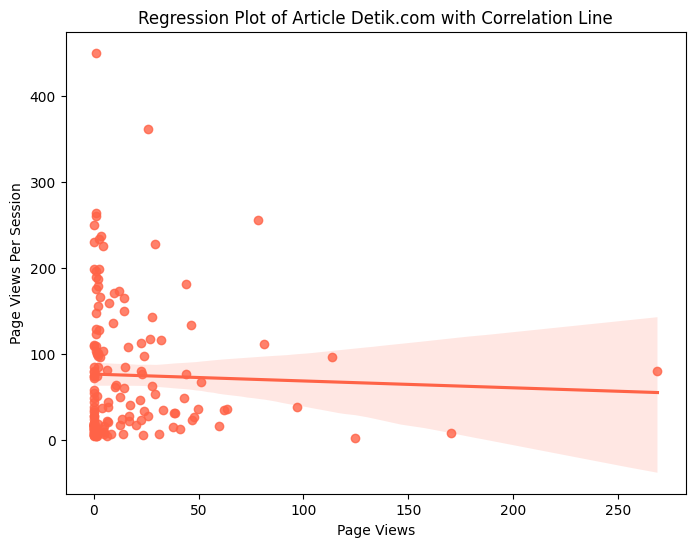

In [52]:
# visualisasi hubungan pageviewsPerSession dan avgTimeOnPage menggunakan regression plot
plt.figure(figsize=(8, 6))
sns.regplot(data=article_df, x='ga:pageviewsPerSession', y='ga:avgTimeOnPage', color='#FF6347')
plt.title('Regression Plot of Article Detik.com with Correlation Line')
plt.xlabel('Page Views')
plt.ylabel('Page Views Per Session')
plt.show()

# Pembahasan

**Pembahasan Pertanyaan 1**

Berdasarkan hasil analisis data artikel berdasarkan metrik users, pageviews, dan avgTimeOnPage, diketahui artikel dengan metrik terbanyak adalah sebagai berikut:

*   Artikel dengan **jumlah pengguna terbanyak** adalah "Antar 'Tuyul', 7 Pengemudi Grab Dibekuk" dengan **43.893 pengguna**.
*   Artikel dengan **jumlah pageviews terbanyak** adalah "Bikin Lambe Turah Diomelin, Nih Si Seksi yang Lengket-lengket sama Gading" dengan **83.593 pageviews**.
*   Artikel dengan **waktu rata-rata di halaman terbanyak** adalah "Jakarta Berkelas Dunia, Ini 5 Mimpi Sandiaga Uno" dengan waktu rata-rata per halaman sebesar **449.90 detik**.

Dari hasil ini, terlihat bahwa artikel dengan metrik tertinggi pada masing-masing kategori tidak selalu sama.

Setelah dianalisis hubungan antar metrik users, pageviwes, dan avgTimeOnPage, didapatkan hasil berikut:
*   Korelasi antara jumlah pengguna (users) dan pageviews adalah 0.74, menunjukkan hubungan positif yang cukup kuat. Artinya artikel dengan lebih banyak pengguna cenderung mendapatkan lebih banyak pageviews.
*   Korelasi antara jumlah pengguna (users) dan waktu rata-rata di halaman (avgTimeOnPage) adalah 0.11, menunjukkan hubungan positif yang sangat lemah. Artinya jumlah pengguna hampir tidak berkorelasi dengan waktu rata-rata yang dihabiskan di halaman.
*   Korelasi antara pageviews dan waktu rata-rata di halaman (avgTimeOnPage) adalah -0.02 yang menunjukkan hubungan negatif yang sangat lemah. Artinya tidak ada hubungan yang signifikan antara jumlah pageviews dan waktu rata-rata di halaman.

Hasil analisis ini mengindikasikan bahwa keterlibatan pengguna, yang diukur dengan waktu rata-rata di halaman, tidak selalu sejalan dengan metrik lainnya seperti jumlah pengguna atau pageviews. Analisis efektivitas yang menggabungkan semua metrik lebih direkomendasikan karena mampu mmemberikan gambaran yang lebih lengkap tentang performa artikel secara keseluruhan. Oleh karena itu, dilakukan penggabungan ketiga metrik tersebut untuk menghitung efektivitas artikel yang dapat memberikan gambaran yang lebih menyeluruh tentang performa artikel, dan didapatkan artikel dengan performa tertinggi adalah artikel **"Melihat Kantor Pelayanan Grab Driver Center"**.







---

**Pembahasan Pertanyaan 2**

Berdasarkan hasil analisis diketahui bahwa korelasi antara pageviews dan pageviewsPerSession adalah -0.033231, yang menunjukkan hubungan negatif yang sangat lemah. Korelasi ini mendekati nol, artinya tidak ada hubungan signifikan antara jumlah pageviews yang diperoleh oleh sebuah artikel dan rata-rata jumlah halaman yang dilihat per sesi pengguna. Dengan kata lain, artikel dengan jumlah pageviews yang tinggi tidak selalu memiliki rasio halaman yang dilihat per sesi yang tinggi juga, dan sebaliknya.



---

**Pembahasan Pertanyaan 3**

Berdasarkan hasil analisis diketahui bahwa korelasi antara pageviewsPerSession dan avgTimeOnPage adalah -0.033222, yang menandakan hubungan negatif yang sangat lemah. Korelasi ini hampir mendekati nol, yang berarti tidak ada hubungan signifikan antara rata-rata jumlah halaman yang dilihat per sesi dan waktu rata-rata yang dihabiskan di setiap halaman. Hal ini mengindikasikan bahwa perubahan dalam rata-rata jumlah halaman yang dilihat per sesi tidak memiliki dampak signifikan terhadap waktu rata-rata yang dihabiskan di halaman, dan sebaliknya sehingga pengguna yang melihat lebih banyak halaman per sesi tidak secara signifikan menghabiskan lebih banyak atau lebih sedikit waktu di setiap halaman.